In [1]:
import pandas as pd


df = pd.read_csv("data/possum.csv")
df = df.drop(columns=["case"])
df["Pop"] = df["Pop"].map(lambda x: 1 if x == "Vic" else 0)
df = df.dropna()

df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [2]:
import numpy as np


X = df.drop(columns=["sex"]).to_numpy()
y = df["sex"].map({"m": 1, "f": -1}).astype(np.int8).to_numpy()
X.shape, y.shape

((101, 12), (101,))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import pandas as pd
from svm import SVM, LinearKernel, RBFKernel, PolynomialKernel


def evaluate_svm(svm, X_test, y_test):
    """Evaluate SVM model and return performance metrics."""
    y_pred = svm.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0.0)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0.0)
    accuracy = accuracy_score(y_test, y_pred)
    return recall, precision, f1, accuracy

# Define configurations
kernels = [
    LinearKernel(),
    RBFKernel(gamma=0.1),
    RBFKernel(gamma=1.0),
    PolynomialKernel(degree=2),
    PolynomialKernel(degree=3)
]
C_values = [0.01, 0.1, 0.5, 1.0, 5.0]


# Collect results
results = []

for kernel in kernels:
    for C in C_values:
        svm = SVM(kernel=kernel, C=C)
        svm.fit(X_train, y_train)
        recall, precision, f1, accuracy = evaluate_svm(svm, X_test, y_test)
        results.append({
            'Kernel': str(kernel),
            'C': C,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1,
            'Accuracy': accuracy
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

/Users/alexanderivanov/programs/python/fall-24/students/ai-ivanov/lab5/.venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


                  Kernel     C    Recall  Precision  F1 Score  Accuracy
0                 Linear  0.01  0.000000   0.000000  0.000000  0.428571
1                 Linear  0.10  0.416667   0.714286  0.526316  0.571429
2                 Linear  0.50  0.416667   0.714286  0.526316  0.571429
3                 Linear  1.00  0.416667   0.714286  0.526316  0.571429
4                 Linear  5.00  0.416667   0.833333  0.555556  0.619048
5         RBF(gamma=0.1)  0.01  0.000000   0.000000  0.000000  0.428571
6         RBF(gamma=0.1)  0.10  0.000000   0.000000  0.000000  0.428571
7         RBF(gamma=0.1)  0.50  0.000000   0.000000  0.000000  0.428571
8         RBF(gamma=0.1)  1.00  0.166667   0.666667  0.266667  0.476190
9         RBF(gamma=0.1)  5.00  0.500000   0.857143  0.631579  0.666667
10        RBF(gamma=1.0)  0.01  0.000000   0.000000  0.000000  0.428571
11        RBF(gamma=1.0)  0.10  0.000000   0.000000  0.000000  0.428571
12        RBF(gamma=1.0)  0.50  0.000000   0.000000  0.000000  0

In [12]:
svm = SVM(kernel=LinearKernel(), C=2.0)
svm.fit(X_train, y_train)

w, b = svm.get_hyperplane_parameters()

print(w, b)


[ 1.11892671 -0.30917753 -0.06131063  0.22219839  0.35002004 -0.65983908
 -0.4395305   0.43593921  0.58868508  0.694385    0.02105419 -0.0419221 ] 0.16985401796298838


In [13]:
from sklearn.decomposition import PCA

# Создаем PCA преобразование для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def plot_svm(svm, X_pca, y_train, w, b):
    # Create a mesh grid for visualization
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Get predictions for each point in the mesh
    Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], 
            c='b', marker='o', label='Class 1 (Train)')
    plt.scatter(X_train_pca[y_train == -1][:, 0], X_train_pca[y_train == -1][:, 1], 
            c='r', marker='s', label='Class -1 (Train)')

    # Plot support vectors
    support_vectors_pca = pca.transform(svm.support_vectors)
    plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k',
            label='Support Vectors')

    # Plot hyperplane
    w_pca = pca.transform(w.reshape(1, -1))[0]
    a = -w_pca[0] / w_pca[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (b) / w_pca[1]
    plt.plot(xx, yy, 'k-', label='Hyperplane')

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.legend()
    plt.show()

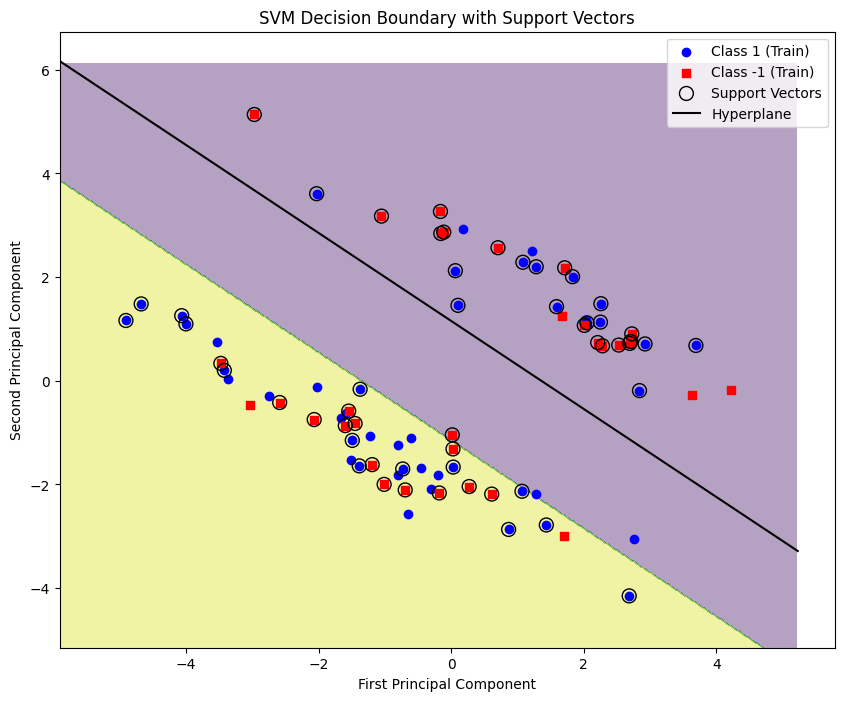

In [17]:
plot_svm(svm, X_pca, y_train, w, b)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import pandas as pd
from svm import SVM, LinearKernel, RBFKernel, PolynomialKernel

def evaluate_svm(svm, X_test, y_test):
    """Evaluate SVM model and return performance metrics."""
    y_pred = svm.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0.0)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0.0)
    accuracy = accuracy_score(y_test, y_pred)
    return recall, precision, f1, accuracy

# Define configurations
kernels = [
    (LinearKernel(), 'linear'),
    (RBFKernel(gamma=1.0), 'rbf'),
    (PolynomialKernel(degree=3), 'poly')
]
C_values = [0.01, 0.1, 0.5]

# Collect results for both implementations
results = []

for custom_kernel, sklearn_kernel in kernels:
    for C in C_values:
        # Custom SVM
        custom_svm = SVM(kernel=custom_kernel, C=C)
        custom_svm.fit(X_train, y_train)
        custom_recall, custom_precision, custom_f1, custom_accuracy = evaluate_svm(custom_svm, X_test, y_test)
        
        # Sklearn SVM
        if isinstance(custom_kernel, RBFKernel):
            sklearn_svm = SVC(kernel=sklearn_kernel, C=C, gamma=custom_kernel.gamma)
        elif isinstance(custom_kernel, PolynomialKernel):
            sklearn_svm = SVC(kernel=sklearn_kernel, C=C, degree=custom_kernel.degree)
        else:
            sklearn_svm = SVC(kernel=sklearn_kernel, C=C)
            
        sklearn_svm.fit(X_train, y_train)
        sklearn_recall, sklearn_precision, sklearn_f1, sklearn_accuracy = evaluate_svm(sklearn_svm, X_test, y_test)
        
        results.append({
            'Kernel': str(custom_kernel),
            'C': C,
            'Implementation': 'Custom',
            'Recall': custom_recall,
            'Precision': custom_precision,
            'F1 Score': custom_f1,
        })
        
        results.append({
            'Kernel': str(custom_kernel),
            'C': C,
            'Implementation': 'Sklearn',
            'Recall': sklearn_recall,
            'Precision': sklearn_precision,
            'F1 Score': sklearn_f1,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Separate results for custom and sklearn implementations
custom_results_df = results_df[results_df['Implementation'] == 'Custom']
sklearn_results_df = results_df[results_df['Implementation'] == 'Sklearn']

# Print results in Markdown format
print("Custom SVM Results:")
print(custom_results_df.sort_values(['Kernel', 'C']).to_markdown(index=False))

print("\nSklearn SVM Results:")
print(sklearn_results_df.sort_values(['Kernel', 'C']).to_markdown(index=False))

/Users/alexanderivanov/programs/python/fall-24/students/ai-ivanov/lab5/.venv/lib/python3.13/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Custom SVM Results:
| Kernel               |    C | Implementation   |   Recall |   Precision |   F1 Score |
|:---------------------|-----:|:-----------------|---------:|------------:|-----------:|
| Linear               | 0.01 | Custom           | 0        |    0        |   0        |
| Linear               | 0.1  | Custom           | 0.416667 |    0.714286 |   0.526316 |
| Linear               | 0.5  | Custom           | 0.416667 |    0.714286 |   0.526316 |
| Polynomial(degree=3) | 0.01 | Custom           | 0.916667 |    0.733333 |   0.814815 |
| Polynomial(degree=3) | 0.1  | Custom           | 0.833333 |    0.714286 |   0.769231 |
| Polynomial(degree=3) | 0.5  | Custom           | 0.833333 |    0.714286 |   0.769231 |
| RBF(gamma=1.0)       | 0.01 | Custom           | 0        |    0        |   0        |
| RBF(gamma=1.0)       | 0.1  | Custom           | 0        |    0        |   0        |
| RBF(gamma=1.0)       | 0.5  | Custom           | 0        |    0        |   0        |

